In [67]:
import sys
print(sys.version)

import numpy as np
import scipy
numpy.version.full_version

a = np.array([0,1,2,3,4,5])
print(a)
print(a.ndim)  # 维度
print(a.shape) # 大小

print(a*2)
print(a**2)

3.8.0 | packaged by conda-forge | (default, Nov  6 2019, 23:20:36) 
[GCC 7.3.0]
[0 1 2 3 4 5]
1
(6,)
[ 0  2  4  6  8 10]
[ 0  1  4  9 16 25]


In [68]:
b = a.reshape((3,2))    
print(b)

[[0 1]
 [2 3]
 [4 5]]


In [69]:
print(a[np.array([2,3,4])])

[2 3 4]


In [70]:
# 无效值
c = np.array([1,2,np.NAN,3,4])

np.isnan(c)


array([False, False,  True, False, False])

In [71]:
### comparing runtime behaviors
# dot() 矩阵乘

import timeit

normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))', number=10000)
naive_np_sec = timeit.timeit('sum(na*na)', setup="import numpy as np; na=np.arange(1000)", number=10000)
good_np_sec = timeit.timeit('na.dot(na)', setup="import numpy as np; na=np.arange(1000)", number=10000)

print("Normaal Python: %f sec" %normal_py_sec)
print("Naive Numpy: %f sec" %naive_np_sec)
print("Good Numpy:%f sec" %good_np_sec )

Normaal Python: 0.545145 sec
Naive Numpy: 1.311331 sec
Good Numpy:0.010251 sec


In [72]:
scipy.dot is np.dot

True

In [73]:
### First Mahcine Leraning Application

In [101]:
import scipy as sp

data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t")
print(data[:10])
print(data.shape)

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]
(743, 2)


In [75]:
x = data[:,0]
y = data[:,1]
sp.sum(sp.isnan(y))
sp.sum(~sp.isnan(y))

735

In [76]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

In [117]:
import matplotlib.pyplot as plt

In [118]:
def error(f,x,y):
    return sp.sum((f(x)-y)**2)

Model parameters: [  2.59619213 989.02487106]
[3.17389767e+08]
2
[1.36699071 0.36240365]
1.63202784619898e-13
 
2.596 x + 989
317389767.339778


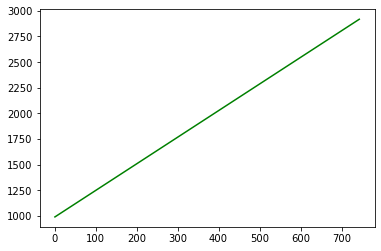

In [119]:
# polyfit 多项式曲线拟合 x,y,1 一阶拟合
# ploy1d 多项式函数， create a model function from the model parameters
# 一阶拟合： 
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
print("Model parameters: %s" %fp1)
print(residuals)
print(rank)
print(sv)
print(rcond)

# it means it is the best straight line fit the function 
# np, sp 都可以
plot_fit1 = np.poly1d(fp1)
plot_fit1_1 = sp.poly1d(fp1)

print(plot_fit1)
print(error(plot_fit1, x, y))
plt.plot(x, plot_fit1(x), 'g', label="first order overfitting")

743.0 1.0 3.0


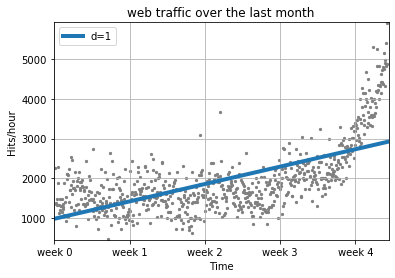

In [120]:
# np.linspace( 0, 2, 9 ) # 返回从 0 to 2的9 个数, 创建等差数列
# what is the difference between fx and x
print(x[-1],x[0],x[1])
fx = sp.linspace(0,x[-1],1000) # generate X-values for plotting
plt.plot(fx, plot_fit1(fx), linewidth=4)
plt.legend(["d=%i" % plot_fit1.order], loc="upper left")

plt.scatter(x,y,c="grey",s=5)
plt.title("web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")

# xticks 显示X轴的刻标 
plt.xticks([w*7*24 for w in range(10)], ['week %i' %w for w in range(10)])
plt.autoscale(tight=True) #
plt.grid()
plt.show()

 
2.596 x + 989
         2
0.01053 x - 5.265 x + 1975
          3           2
3.05e-05 x - 0.02359 x + 4.942 x + 1333
           4             3           2
8.988e-08 x - 0.0001036 x + 0.04082 x - 5.798 x + 1741
           5             4             3           2
2.165e-10 x - 3.134e-07 x + 0.0001638 x - 0.03415 x + 2.248 x + 1536


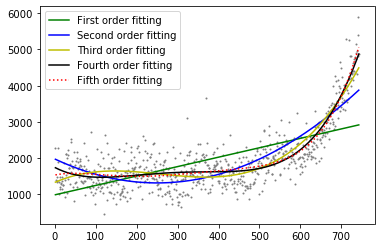

In [172]:

# coef 为系数，poly_fit 拟合函数
coef1 = np.polyfit(x,y, 1)
poly_fit1 = np.poly1d(coef1)
plt.plot(x, poly_fit1(x), 'g',label="First order fitting")
print(poly_fit1)

coef2 = np.polyfit(x,y, 2)
poly_fit2 = np.poly1d(coef2)
plt.plot(x, poly_fit2(x), 'b',label="Second order fitting")
print(poly_fit2)

coef3 = np.polyfit(x,y, 3)
poly_fit3 = np.poly1d(coef3)
plt.plot(x, poly_fit3(x), 'y',label="Third order fitting")
print(poly_fit3)

coef4 = np.polyfit(x,y, 4)
poly_fit4 = np.poly1d(coef4)
plt.plot(x, poly_fit4(x), 'k',label="Fourth order fitting")
print(poly_fit4)

coef5 = np.polyfit(x,y, 5)
poly_fit5 = np.poly1d(coef5)
plt.plot(x, poly_fit5(x), 'r:',label="Fifth order fitting")
print(poly_fit5)

# coef100 = np.polyfit(x,y, 100)
# poly_fit100 = np.poly1d(coef100)
# plt.plot(x, poly_fit100(x), 'purple',label="100 order fitting")
# print(poly_fit100)

plt.scatter(x, y, color='grey', s=1)
plt.legend(loc=2)
plt.show()

In [124]:
f2p = sp.polyfit(x, y, 2)
print(f2p)
f2 = sp.poly1d(f2p)
print(error(f2,x,y))

[ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
179983507.8781792


Error inflection=122584668.146112


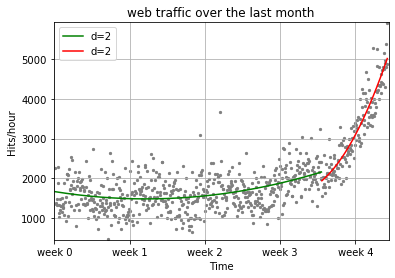

In [176]:
inflection = 588 # calculate the inflection point in hours
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]
xb = x[inflection:] # data after
yb = y[inflection:]
fa = sp.poly1d(sp.polyfit(xa, ya, 2))
fb = sp.poly1d(sp.polyfit(xb, yb, 2))
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

fx = sp.linspace(0,x[-1],1000) # generate X-values for plotting
#plt.plot(x, poly_fit100(x), 'purple',label="100 order fitting")
a, = plt.plot(xa, fa(xa),'green', label="d=1") # , 需要
b, = plt.plot(xb, fb(xb), 'red', label="d=1")
plt.legend([a,b],["d=%i" % fa.order,"d=%i" % fb.order], loc="upper left")
#plt.legend(["d=%i" % fb.order], loc="upper left")

plt.scatter(x,y,c="grey",s=5)
plt.title("web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")

# xticks 显示X轴的刻标 
plt.xticks([w*7*24 for w in range(10)], ['week %i' %w for w in range(10)])
plt.autoscale(tight=True) #
plt.grid()
plt.show()

In [177]:
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' plot input data '''

    plt.figure(num=None, figsize=(8, 6))
    plt.clf() # clear
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])

    # zip 将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表
    if models:
        if mx is None:
            mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0) # xlim and ylim 设置x轴和y轴的显示范围
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

fbt2(x)=
         2
0.07814 x - 84.05 x - 7.571e+04
Test errors for only the time after inflection point
Error d=1: 6680072.933110
Error d=2: 5898158.874263
Error d=3: 5991571.439588
Error d=10: 6763203.772848
Error d=53: 10250283.538604


/home/tintin/anaconda3/envs/BooksLearning/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/tintin/anaconda3/envs/BooksLearning/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


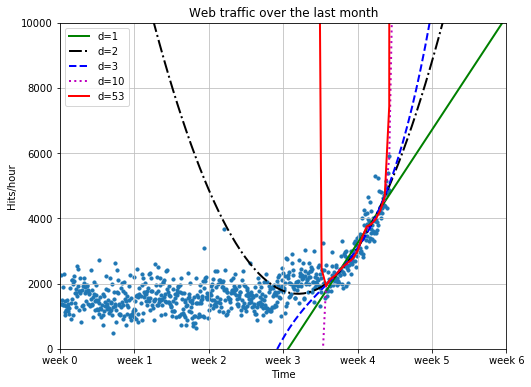

In [187]:
# seperate training from testing data
# sp.random.permutation 随机排列一个序列，返回一个排列的序列。
import os
#from utils import DATA_DIR, CHART_DIR

colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']

frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = sp.poly1d(sp.polyfit(xb[train],yb[train],1))
fbt2 = sp.poly1d(sp.polyfit(xb[train],yb[train],2))
print("fbt2(x)=\n%s"%(fbt2-100000))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],
    os.path.join("data/", "1400_01_08.png"),
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

In [195]:
# fsolve 函数， 非线性方程组的求解 X=fsolve('fun',X0,option)

print(fbt2-100000)

from scipy.optimize import fsolve

reached_max = fsolve(fbt2 -100000, 800)/(7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

         2
0.07814 x - 84.05 x - 7.571e+04
100,000 hits/hour expected at week 9.877861
